# Simulating electron - proton collisions 

### Day-4 : Closer look at the scattering and proton breakup 



In [1]:
# Importing useful headers
import pythia8
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Initialize the pythia object and setup the type of collisions 

In [2]:
pythia = pythia8.Pythia()
#Set up incoming beams, for frame with unequal beam energies.
pythia.readString("Beams:frameType = 2")


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.307      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 25 Feb 2022  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 18 Jul 2023 at 17:49:01    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

True

In [3]:
# Set the proton energy - 
pEnergy = 920
#BeamA = proton.
pythia.readString("Beams:idA = 2212")
pythia.settings.parm("Beams:eA", pEnergy)

In [4]:
# Set the electron energy - 
eEnergy = 500
#BeamB = electron.
pythia.readString("Beams:idB = 11")
pythia.settings.parm("Beams:eB", eEnergy)

In [5]:
#Set up DIS process within some phase space.
#Neutral current (with gamma/Z interference).
pythia.readString("WeakBosonExchange:ff2ff(t:gmZ) = on")

#Phase-space cut: minimal Q2 of process.
pythia.settings.parm("PhaseSpace:Q2Min", 25)

#Set dipole recoil on. Necessary for DIS + shower.
pythia.readString("SpaceShower:dipoleRecoil = on")

#Allow emissions up to the kinematical limit,
#since rate known to match well to matrix elements everywhere.
pythia.readString("SpaceShower:pTmaxMatch = 2")

#QED radiation off lepton not handled yet by the new procedure.
pythia.readString("PDF:lepton = off")
pythia.readString("TimeShower:QEDshowerByL = off")

pythia.init()


 *-------  PYTHIA Process Initialization  --------------------------*
 |                                                                  |
 | We collide p+ with e- at a CM energy of 1.356e+03 GeV            |
 |                                                                  |
 |------------------------------------------------------------------|
 |                                                    |             |
 | Subprocess                                    Code |   Estimated |
 |                                                    |    max (mb) |
 |                                                    |             |
 |------------------------------------------------------------------|
 |                                                    |             |
 | f f' -> f f' (t-channel gamma*/Z0)             211 |   3.797e-04 |
 |                                                                  |
 *-------  End PYTHIA Process Initialization -----------------------*

 *-------  PYTHIA 

True

In [6]:
Number_of_events = 10

In [7]:
pythia.next()

part_pt = []
part_eta = []
part_theta = []
part_phi = []
part_E = []
part_p = []
part_m = []
part_id = []

for particle in pythia.event:
    #if 1:
    if particle.isFinal():
        pT = float('%.3g' % particle.pT())
        part_pt.append(pT)
        eta = float('%.3g' % particle.eta())
        part_eta.append(eta)
        theta = float('%.3g' % particle.theta())
        part_theta.append(theta)
        phi = float('%.3g' % particle.phi())
        part_phi.append(phi)
        E = float('%.3g' % particle.e())
        part_E.append(E)
        p = float('%.3g' % particle.pAbs())
        part_p.append(p)
        mass = float('%.3g' % particle.m())
        part_m.append(mass)
        part_id.append(particle.id())
        print(particle.id(), pT, eta, theta, phi, E, p, mass)

part_pt = np.array(part_pt)
part_phi = np.array(part_phi)
part_eta = np.array(part_eta)
part_theta = np.array(part_theta)
part_E = np.array(part_E)
part_p = np.array(part_p)
part_m = np.array(part_m)
part_id = np.array(part_id)
particles = np.vstack((part_id, part_pt, part_phi, part_eta, part_theta, part_E, part_p, part_m)).T

11
 --------  PYTHIA Info Listing  ---------------------------------------- 
 
 Beam A: id =   2212, pz =  6.782e+02, e =  6.782e+02, m =  9.383e-01.
 Beam B: id =     11, pz = -6.782e+02, e =  6.782e+02, m =  5.110e-04.

 In 1: id =   -3, x =  7.164e-04, pdf =  6.311e-01 at Q2 =  7.464e+01.
 In 2: id =   11, x =  1.000e+00, pdf =  1.000e+00 at same Q2.

 Subprocess f f' -> f f' (t-channel gamma*/Z0) with code 211 is 2 -> 2.
 It has sHat =  1.318e+03,    tHat = -7.943e+01,    uHat = -1.239e+03,
       pTHat =  8.638e+00,   m3Hat =  5.000e-01,   m4Hat =  5.110e-04,
    thetaHat =  4.960e-01,  phiHat =  4.026e+00.
     alphaEM =  7.614e-03,  alphaS =  2.076e-01    at Q2 =  7.464e+01.

 Impact parameter b =  0.000e+00 gives enhancement factor =  1.000e+00.
 Max pT scale for MPI =  1.356e+03, ISR =  1.356e+03, FSR =  1.356e+03.
 Number of MPI =     1, ISR =     0, FSRproc =     0, FSRreson =     0.

 --------  End PYTHIA Info Listing  ------------------------------------

 --------  PYTHIA

#### Worksheet to guide the structured tutorial, varying the setup - to build intuition 
what did we start with, and what did we change, and what did we see - learning objectives for the day 
something to guide the activities 
connect to big picture of why it matters 
### where did we get this simulation from? is this just random or what are these numbers 
#### dice rolls 

In [8]:
Event_Particles = pd.DataFrame(particles, columns=['ID','pT','phi','eta','theta','Energy', 'momentum','mass'])
Event_Particles

,ID,pT,phi,eta,theta,Energy,momentum,mass
0,11.0,8.6400,0.88400,-4.6900,3.120000,470.0000,470.0000,0.000511
1,211.0,0.1630,-1.97000,5.8000,0.006030,27.1000,27.1000,0.140000
2,-211.0,0.5270,2.27000,7.6900,0.000913,577.0000,577.0000,0.140000
3,211.0,0.3880,0.94200,6.4800,0.003080,126.0000,126.0000,0.140000
4,-211.0,0.2670,0.62600,5.7900,0.006120,43.7000,43.7000,0.140000
5,211.0,0.7120,-0.97800,4.3600,0.025500,27.9000,27.9000,0.140000
6,-211.0,0.1870,1.35000,4.3800,0.025000,7.4700,7.4700,0.140000
7,211.0,0.2100,0.57100,4.2400,0.028900,7.2600,7.2600,0.140000
8,-211.0,0.5310,-0.90000,-1.0500,2.470000,0.8600,0.8490,0.140000
9,211.0,0.3460,-0.30100,0.0678,1.500000,0.3740,0.3470,0.140000


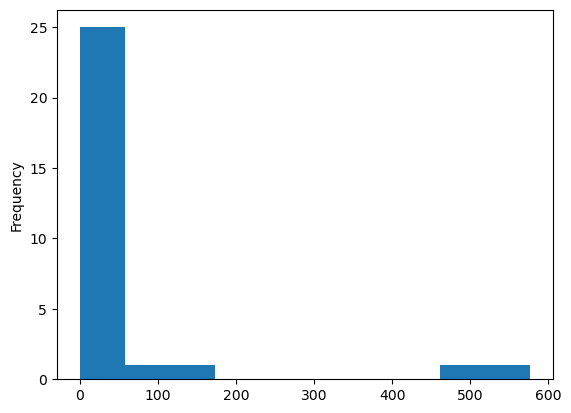

In [9]:
Event_Particles['Energy'].plot.hist()
plt.show()

In [10]:
Number_of_events = 10

delphi = []
deleta = []
scattered_pT = []
photon_pT = []

# Begin event loop. Generate event. Skip if error.
for iEvent in range(0, Number_of_events):
    if not pythia.next():
        continue
    proton = pythia.event[1].p()
    electron_in = pythia.event[4].p()
    electron_out = pythia.event[6].p()
    photon = electron_in - electron_out
    deta = photon.eta()
    dphi = photon.phi()
    if dphi > 3.1415:
        dphi = 6.2832 - dphi    
    delphi.append(dphi)
    deleta.append(deta)
    scattered_pT.append(electron_out.pT())
    photon_pT.append(photon.pT())

delphi = np.array(delphi)
deleta = np.array(deleta)
scattered_pT = np.array(scattered_pT)
photon_pT = np.array(photon_pT)
# End of event loop. Statistics. Histogram. Done.
pythia.stat()



 *-------  PYTHIA Event and Cross Section Statistics  -------------------------------------------------------------*
 |                                                                                                                 |
 | Subprocess                                    Code |            Number of events       |      sigma +- delta    |
 |                                                    |       Tried   Selected   Accepted |     (estimated) (mb)   |
 |                                                    |                                   |                        |
 |-----------------------------------------------------------------------------------------------------------------|
 |                                                    |                                   |                        |
 | f f' -> f f' (t-channel gamma*/Z0)             211 |          65         11         11 |   9.121e-05  1.281e-05 |
 |                                                    |        

(array([1., 2., 0., 1., 0., 1., 2., 0., 0., 3.]),
 array([-5.36879584, -4.83418381, -4.29957178, -3.76495975, -3.23034772,
        -2.69573569, -2.16112366, -1.62651163, -1.0918996 , -0.55728757,
        -0.02267554]),
 <BarContainer object of 10 artists>)

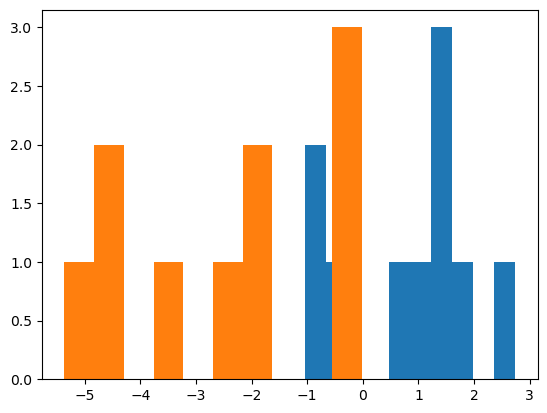

In [11]:
plt.hist(delphi, bins=10)
plt.hist(deleta, bins=10)

(array([1., 1., 3., 1., 2., 0., 0., 0., 0., 2.]),
 array([ 3.03022024,  4.02050703,  5.01079382,  6.00108061,  6.99136741,
         7.9816542 ,  8.97194099,  9.96222778, 10.95251457, 11.94280137,
        12.93308816]),
 <BarContainer object of 10 artists>)

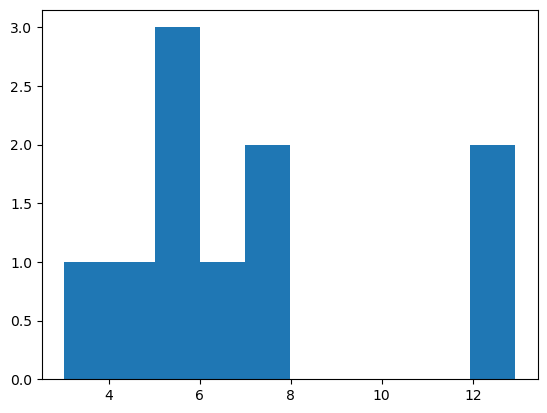

In [12]:
#plt.hist(scattered_pT)
plt.hist(photon_pT)

(array([1., 1., 3., 1., 2., 0., 0., 0., 0., 2.]),
 array([ 3.03022024,  4.02050703,  5.01079382,  6.00108061,  6.99136741,
         7.9816542 ,  8.97194099,  9.96222778, 10.95251457, 11.94280137,
        12.93308816]),
 <BarContainer object of 10 artists>)

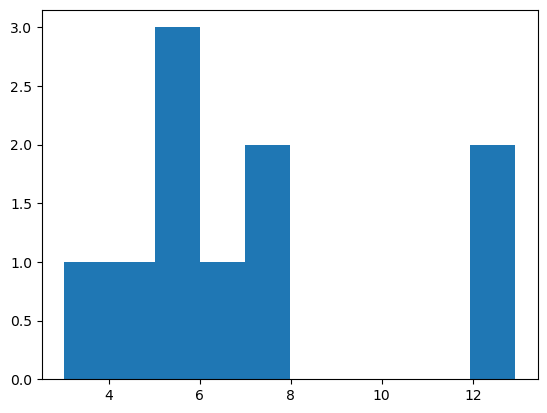

In [13]:
plt.hist(scattered_pT)

In [14]:
# check struck quark index in pythia event
counter = 0
for particle in pythia.event:
    if (particle.status() == -23 and particle.id() != 11):
        print(counter)
    counter += 1

5


In [15]:
electron_in = pythia.event[4].p() # 4 vector
electron_out = pythia.event[6].p()
photon = electron_in - electron_out
quark = pythia.event[5].p()

In [16]:
photon.m2Calc() # check Q2

-89.39046948921168

In [17]:
radii = [0, 100, 200, 300, 400, 500, 600]
r_labels = ['$0$','$100$','$200$','$300$','$400$','$500$','$600$']
angles = [0, 2.09858297, 5.70047087, 15.4146268, 40.3950626, 90, 139.604937421, 164.585373193, 174.299529125, 177.90141703, 180]
eta_labels=['','','3','2','1','0','-1','-2','-3','','']
nr = 600
ntheta = 90

470.0


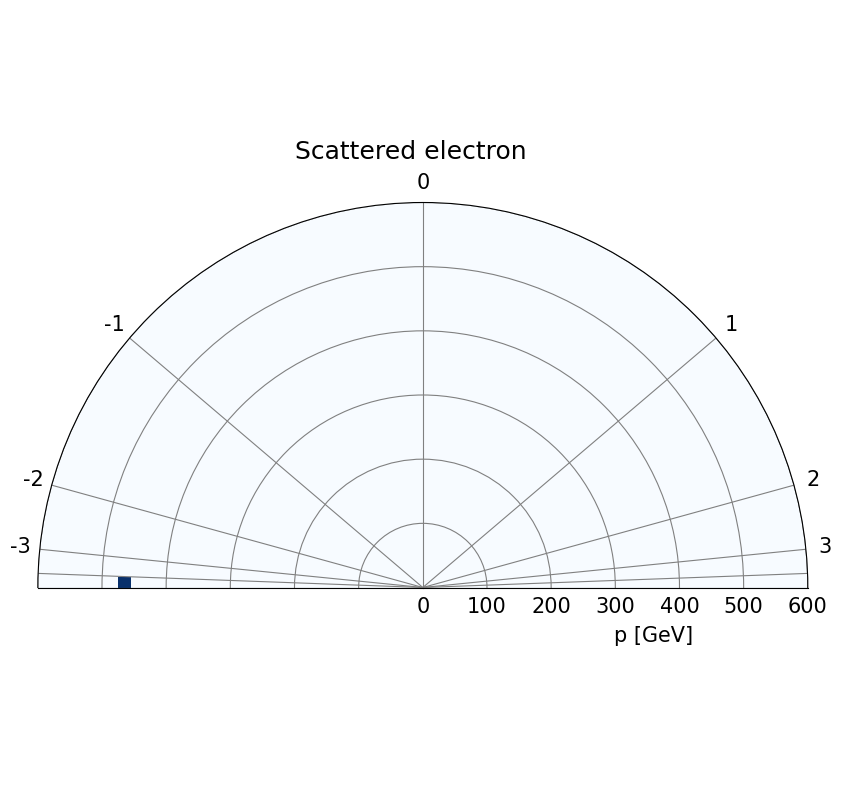

In [18]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

r_edges = np.linspace(0, nr, 30)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([Event_Particles.iloc[0]['momentum']], [Event_Particles.iloc[0]['theta']], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = ax1.pcolormesh(Theta, R, H_e, cmap='Blues')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
ax1.set_thetamax(180)
fig.suptitle('Scattered electron', y=0.75)
print(Event_Particles.iloc[0]['momentum'])

Text(0.5, 0.75, 'Other final state particles')

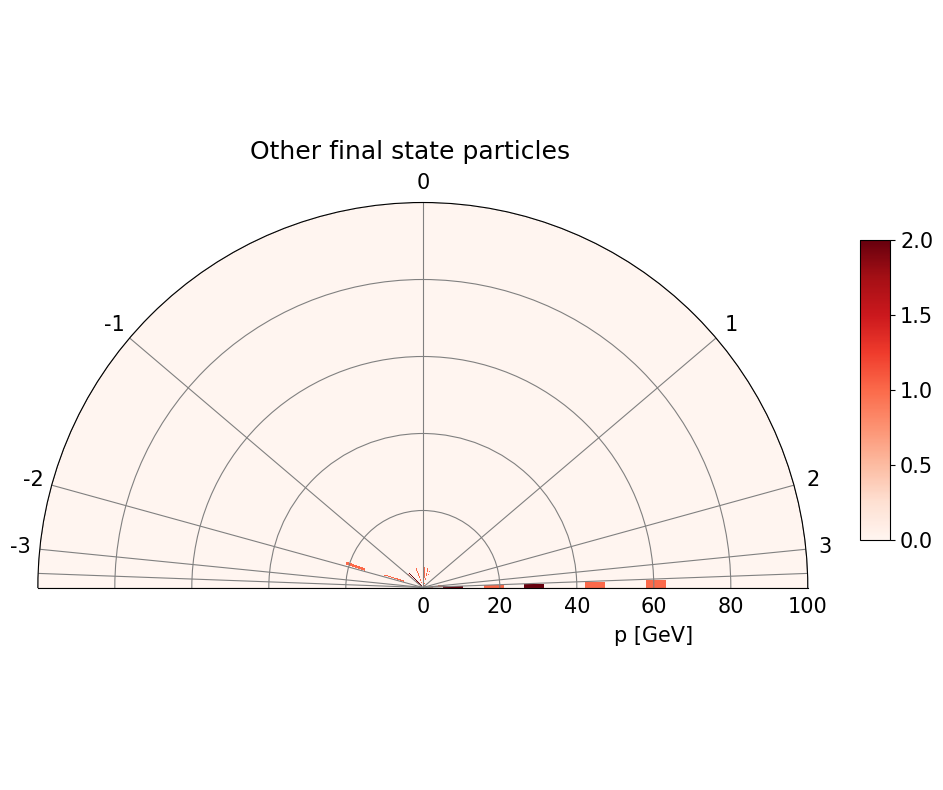

In [19]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

#r_edges = np.linspace(0, nr, 30)
r_edges = np.linspace(0, 100, 20)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([Event_Particles.iloc[0]['momentum']], [Event_Particles.iloc[0]['theta']], [r_edges, theta_edges])[0]
H = plt.hist2d(Event_Particles.iloc[1:]['momentum'], Event_Particles.iloc[1:]['theta'], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im = ax1.pcolormesh(Theta, R, H, cmap='Reds')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
cbar = fig.colorbar(im, shrink=0.7, pad=0.01, cax=plt.axes([0.95, 0.35, 0.03, 0.3]))
cbar.ax.tick_params(labelsize=15)
im.set_clim(0,2)
ax1.set_thetamax(180)
fig.suptitle('Other final state particles', y=0.75)

    -1.504     5.615  -311.043   310.954 (   -9.455)

311.09767656803854 3.1229064298799414


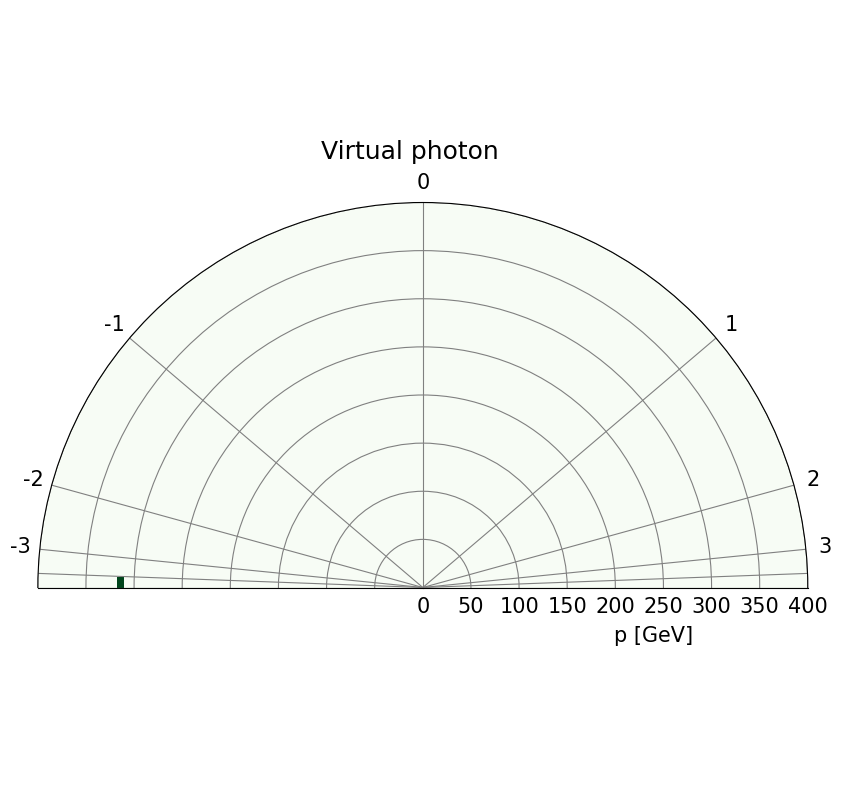

In [21]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

r_edges = np.linspace(0, 400, 50)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([photon.pAbs()], [photon.theta()], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = ax1.pcolormesh(Theta, R, H_e, cmap='Greens')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
ax1.set_thetamax(180)
fig.suptitle('Virtual photon', y=0.75)

print(photon)
print(photon.pAbs(),photon.theta())

    -1.504     5.615  -310.972   311.026 (    0.330)

311.0259831787303 3.1229021220896387


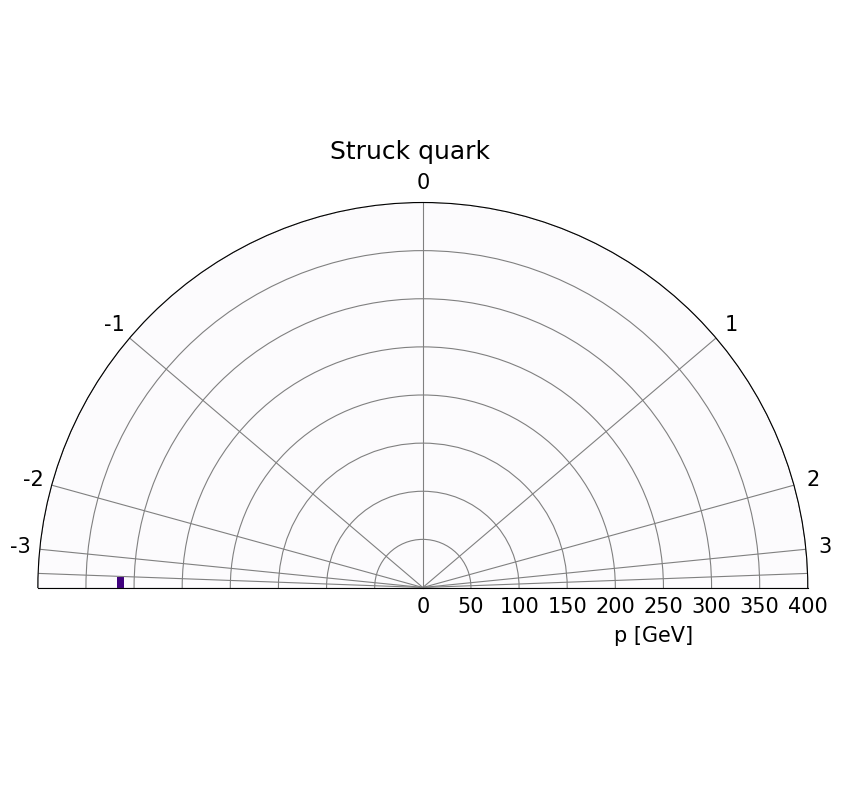

In [23]:
fig = plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = '15'

ax1 = fig.add_subplot(111, polar=True)

r_edges = np.linspace(0, 400, 50)
theta_edges = np.linspace(0, np.pi, ntheta + 1)
H_e = plt.hist2d([quark.pAbs()], [quark.theta()], [r_edges, theta_edges])[0]
ax1.cla()

Theta, R = np.meshgrid(theta_edges, r_edges)
im_e = ax1.pcolormesh(Theta, R, H_e, cmap='Purples')
ax1.set_thetagrids(angles, labels=eta_labels, fontsize=15)
ax1.set_xlabel('p [GeV]')
ax1.xaxis.set_label_coords(0.8, 0.2)
ax1.grid(color='grey')
im_e.set_clim(0,1)
ax1.set_thetamax(180)
fig.suptitle('Struck quark', y=0.75)

print(quark)
print(quark.pAbs(),quark.theta())

In [24]:
from mpl_toolkits import mplot3d

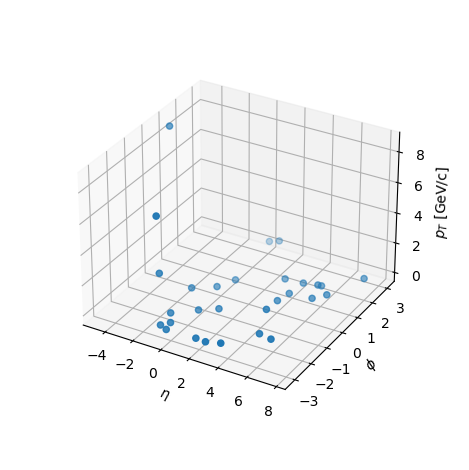

In [82]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = Event_Particles['pT']
xdata = Event_Particles['eta']
ydata = Event_Particles['phi']
ax.scatter3D(xdata, ydata, zdata)
ax.set_xlabel('$\eta$')
ax.set_ylabel('$\phi$')
ax.set_zlabel('$p_T$ [GeV/c]')
ax.set_box_aspect(None, zoom=0.8)

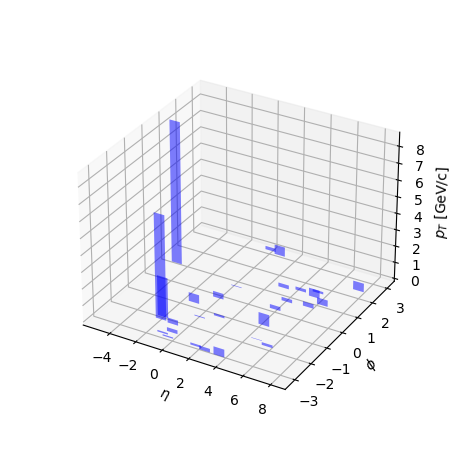

In [84]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = Event_Particles['pT']
xdata = Event_Particles['eta']
ydata = Event_Particles['phi']
for x,y,z in zip(xdata,ydata,zdata):
    ax.bar([x], [z], zs=[y], zdir='y', color='b', alpha=0.5)
ax.set_xlabel('$\eta$')
ax.set_ylabel('$\phi$')
ax.set_zlabel('$p_T$ [GeV/c]')
ax.set_box_aspect(None, zoom=0.8)

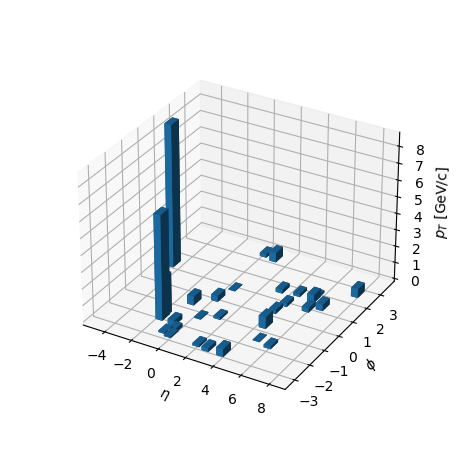

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data for three-dimensional scattered points
zdata = Event_Particles['pT']
xdata = Event_Particles['eta']
ydata = Event_Particles['phi']
n = Event_Particles.shape[0]
ax.bar3d(xdata,ydata,np.zeros(n),np.ones(n)*0.5,np.ones(n)*0.5,zdata)
ax.set_xlabel('$\eta$')
ax.set_ylabel('$\phi$')
ax.set_zlabel('$p_T$ [GeV/c]')
ax.set_box_aspect(None, zoom=0.8)
plt.show()

In [170]:
Event_Particles.to_csv('event.csv')

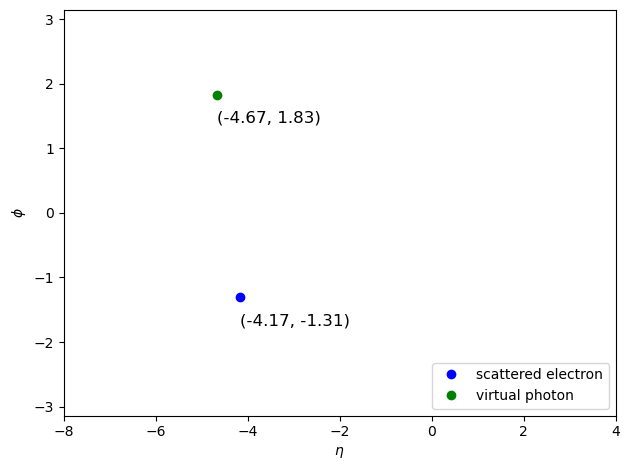

In [86]:
plt.plot(electron_out.eta(), electron_out.phi(), 'bo', label='scattered electron')
plt.plot(photon.eta(), photon.phi(), 'go', label='virtual photon')
A = [electron_out.eta(), photon.eta()]
B = [electron_out.phi(), photon.phi()]
plt.xlim(-8,4)
plt.ylim(-np.pi, np.pi)
plt.legend(fontsize=10, loc='lower right')
plt.xlabel('$\eta$')
plt.ylabel('$\phi$')
for xy in zip(A, B):
    plt.annotate('(%.2f, %.2f)' % xy, xy=xy, xytext=(0,-20), textcoords='offset points', fontsize=12)

In [87]:
print(photon.phi()-electron_out.phi())

3.141592653589793


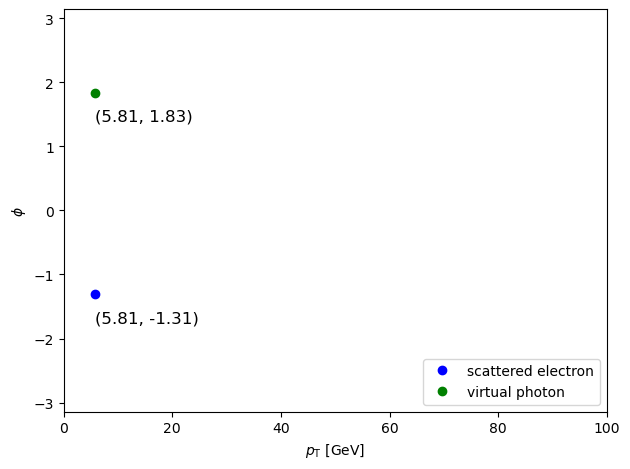

In [88]:
plt.plot(electron_out.pT(), electron_out.phi(), 'bo', label='scattered electron')
plt.plot(photon.pT(), photon.phi(), 'go', label='virtual photon')
A = [electron_out.pT(), photon.pT()]
B = [electron_out.phi(), photon.phi()]
plt.xlim(0,100)
plt.ylim(-np.pi, np.pi)
plt.legend(fontsize=10, loc='lower right')
plt.xlabel('$p_\mathrm{T}$ [GeV]')
plt.ylabel('$\phi$')
for xy in zip(A, B):
    plt.annotate('(%.2f, %.2f)' % xy, xy=xy, xytext=(0,-20), textcoords='offset points', fontsize=12)

In [89]:
delphi = []
deleta = []
scattered_pT = []
photon_pT = []
quark_pid = []

# Begin event loop. Generate event. Skip if error.
for iEvent in range(0, Number_of_events):
    if not pythia.next():
        continue
    proton = pythia.event[1].p()
    electron_in = pythia.event[4].p()
    electron_out = pythia.event[6].p()
    photon = electron_in - electron_out
    deta = photon.eta()
    dphi = photon.phi()
    if dphi > 3.1415:
        dphi = 6.2832 - dphi    
    delphi.append(dphi)
    deleta.append(deta)
    scattered_pT.append(electron_out.pT())
    photon_pT.append(photon.pT())
    quark_pid.append(pythia.event[5].id())

delphi = np.array(delphi)
deleta = np.array(deleta)
scattered_pT = np.array(scattered_pT)
photon_pT = np.array(photon_pT)
quark_pid = np.array(quark_pid)
# End of event loop. Statistics. Histogram. Done.
pythia.stat()


 *-------  PYTHIA Event and Cross Section Statistics  -------------------------------------------------------------*
 |                                                                                                                 |
 | Subprocess                                    Code |            Number of events       |      sigma +- delta    |
 |                                                    |       Tried   Selected   Accepted |     (estimated) (mb)   |
 |                                                    |                                   |                        |
 |-----------------------------------------------------------------------------------------------------------------|
 |                                                    |                                   |                        |
 | f f' -> f f' (t-channel gamma*/Z0)             211 |         100         21         21 |   9.577e-05  1.089e-05 |
 |                                                    |        

array([-1,  2, -4, -2, -2, -5, -4,  2, -4,  2])

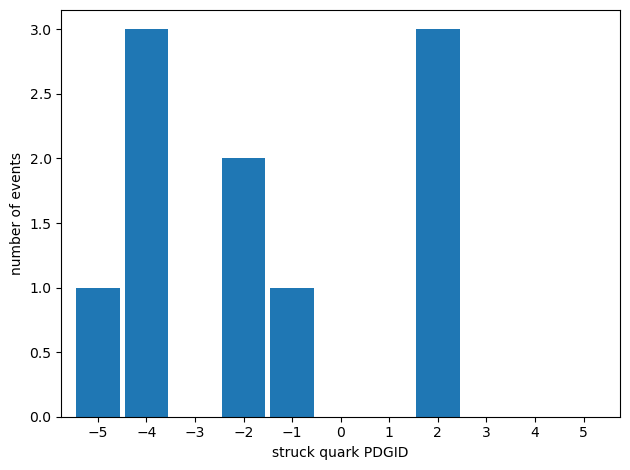

In [90]:
h = plt.hist(quark_pid, bins=np.arange(-5,7)-0.5, rwidth=0.9)
plt.xlabel('struck quark PDGID')
plt.ylabel('number of events')
plt.xticks(h[1] + 0.5)
plt.xlim(-5.75,5.75)
quark_pid